In [48]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
warnings.filterwarnings('ignore')


In [50]:
df = pd.read_csv("/content/Nq Historical Data.csv")

In [51]:
price_columns = ['Open', 'High', 'Low', 'Close']
for col in price_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '').str.replace('$', '').str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [52]:
df

,Date,Open,High,Low,Close,Parsed_Date,Day
0,06-11-2025,21945.80,22106.00,21790.80,21887.50,2025-06-11 00:00:00,Wednesday
1,06-10-2025,21824.00,21992.30,21732.00,21962.50,2025-06-10 00:00:00,Tuesday
2,06-09-2025,21799.30,21890.80,21716.00,21821.50,2025-06-09 00:00:00,Monday
3,06-06-2025,21471.00,21873.50,21471.00,21789.50,2025-06-06 00:00:00,Friday
4,06-05-2025,21744.80,21935.00,21503.50,21582.30,2025-06-05 00:00:00,Thursday
...,...,...,...,...,...,...,...
2513,06-20-2014,3787.00,3799.50,3784.75,3793.25,2014-06-20 00:00:00,Friday
2514,06-19-2014,3794.75,3803.25,3774.25,3789.00,2014-06-19 00:00:00,Thursday
2515,06-18-2014,3773.25,3800.25,3755.00,3795.75,2014-06-18 00:00:00,Wednesday
2516,06-17-2014,3772.75,3786.00,3763.00,3772.25,2014-06-17 00:00:00,Tuesday


In [53]:
print("Data types after conversion:")
print(df.dtypes)
print(f"\nShape of data: {df.shape}")
print(f"Date range: {df['Parsed_Date'].min()} to {df['Parsed_Date'].max()}")
print("\nFirst few rows:")
print(df.head())
print(f"\nAny missing values: {df[price_columns].isnull().sum().sum()}")
if df[price_columns].isnull().sum().sum() > 0:
    print("Rows with missing values:")
    print(df[df[price_columns].isnull().any(axis=1)])
    df.dropna(subset=price_columns, inplace=True)
    print(f"Shape after dropping NaNs: {df.shape}")

Data types after conversion:
Date            object
Open           float64
High           float64
Low            float64
Close          float64
Parsed_Date     object
Day             object
dtype: object

Shape of data: (2518, 7)
Date range: 2014-06-16 00:00:00 to 2025-06-11 00:00:00

First few rows:
         Date     Open     High      Low    Close          Parsed_Date  \
0  06-11-2025  21945.8  22106.0  21790.8  21887.5  2025-06-11 00:00:00   
1  06-10-2025  21824.0  21992.3  21732.0  21962.5  2025-06-10 00:00:00   
2  06-09-2025  21799.3  21890.8  21716.0  21821.5  2025-06-09 00:00:00   
3  06-06-2025  21471.0  21873.5  21471.0  21789.5  2025-06-06 00:00:00   
4  06-05-2025  21744.8  21935.0  21503.5  21582.3  2025-06-05 00:00:00   

         Day  
0  Wednesday  
1    Tuesday  
2     Monday  
3     Friday  
4   Thursday  

Any missing values: 0


In [54]:
import pandas as pd
df['Parsed_Date'] = pd.to_datetime(df['Parsed_Date'])
df['Weekday'] = df['Parsed_Date'].dt.dayofweek
df['WeekdayName'] = df['Parsed_Date'].dt.day_name()
df

,Date,Open,High,Low,Close,Parsed_Date,Day,Weekday,WeekdayName
0,06-11-2025,21945.80,22106.00,21790.80,21887.50,2025-06-11,Wednesday,2,Wednesday
1,06-10-2025,21824.00,21992.30,21732.00,21962.50,2025-06-10,Tuesday,1,Tuesday
2,06-09-2025,21799.30,21890.80,21716.00,21821.50,2025-06-09,Monday,0,Monday
3,06-06-2025,21471.00,21873.50,21471.00,21789.50,2025-06-06,Friday,4,Friday
4,06-05-2025,21744.80,21935.00,21503.50,21582.30,2025-06-05,Thursday,3,Thursday
...,...,...,...,...,...,...,...,...,...
2513,06-20-2014,3787.00,3799.50,3784.75,3793.25,2014-06-20,Friday,4,Friday
2514,06-19-2014,3794.75,3803.25,3774.25,3789.00,2014-06-19,Thursday,3,Thursday
2515,06-18-2014,3773.25,3800.25,3755.00,3795.75,2014-06-18,Wednesday,2,Wednesday
2516,06-17-2014,3772.75,3786.00,3763.00,3772.25,2014-06-17,Tuesday,1,Tuesday


In [55]:
# Basic Metrics
df['Range'] = df['High'] - df['Low']
df['RangePercent'] = (df['Range'] / df['Open']) * 100
df['BodySize'] = abs(df['Close'] - df['Open'])
df['IsBullish'] = df['Close'] > df['Open']
df['IsBearish'] = df['Close'] < df['Open']
df['OpenClosePercent'] = ((df['Close'] - df['Open']) / df['Open']) * 100

In [56]:
# Previous day values
df['PrevHigh'] = df['High'].shift(1)
df['PrevLow'] = df['Low'].shift(1)
df['PrevClose'] = df['Close'].shift(1)
df['PrevRange'] = df['Range'].shift(1)
df['PrevOpen'] = df['Open'].shift(1)

In [57]:
# Gap calculations
df['GapUp'] = df['Open'] > df['PrevClose']
df['GapDown'] = df['Open'] < df['PrevClose']
df['GapPercent'] = ((df['Open'] - df['PrevClose']) / df['PrevClose']) * 100

In [58]:
# Inside/Outside bars
df['InsideBar'] = (df['High'] <= df['PrevHigh']) & (df['Low'] >= df['PrevLow'])
df['OutsideBar'] = (df['High'] > df['PrevHigh']) & (df['Low'] < df['PrevLow'])


In [59]:
# Range comparisons
df['RangeVsPrev'] = df['Range'] > df['PrevRange']

In [60]:
# Week identification
df['Week'] = df['Parsed_Date'].dt.isocalendar().week
df['Year'] = df['Parsed_Date'].dt.year
df['YearWeek'] = df['Year'].astype(str) + '-W' + df['Week'].astype(str).str.zfill(2)
df.dropna(subset=['PrevClose', 'PrevHigh', 'PrevLow', 'PrevRange', 'PrevOpen'], inplace=True)
df.reset_index(drop=True, inplace=True)

1. Average Range by Weekday:
WeekdayName
Friday       198.98
Monday       200.06
Thursday     214.48
Tuesday      195.11
Wednesday    210.17
Name: Range, dtype: float64


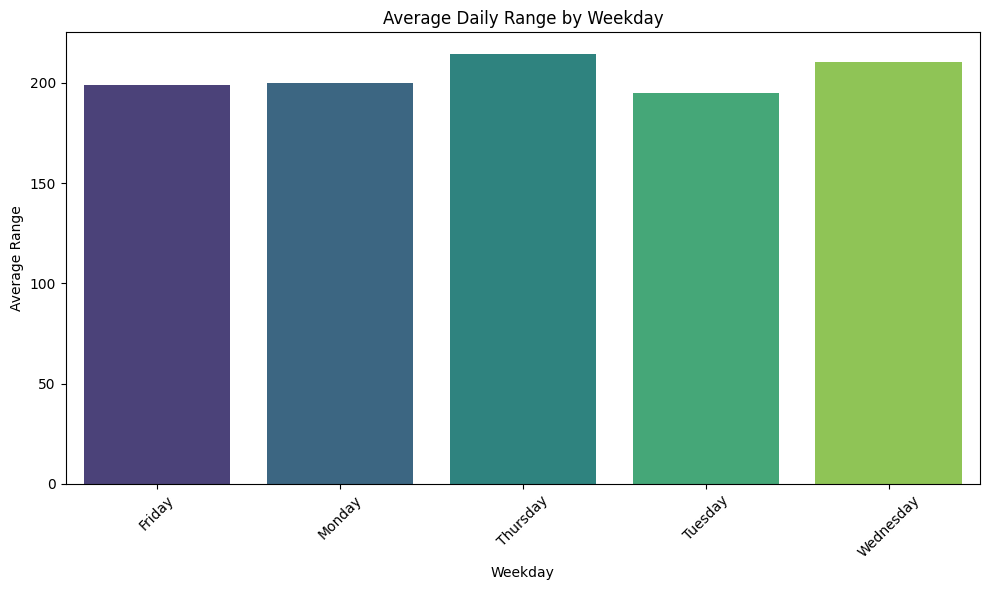

In [61]:
# 1. Average range by weekday
avg_range_by_day = df.groupby('WeekdayName')['Range'].mean().round(2)
print("1. Average Range by Weekday:")
print(avg_range_by_day)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_range_by_day.index, y=avg_range_by_day.values, palette='viridis')
plt.title('Average Daily Range by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
# 2. Max range by weekday
max_range_by_day = df.groupby('WeekdayName')['Range'].max().round(2)
print("\n2. Max Range by Weekday:")
print(max_range_by_day)


2. Max Range by Weekday:
WeekdayName
Friday       1325.5
Monday       1747.0
Thursday     1464.5
Tuesday      1383.8
Wednesday    2651.8
Name: Range, dtype: float64


In [63]:
# 3. Min range by weekday
min_range_by_day = df.groupby('WeekdayName')['Range'].min().round(2)
print("\n3. Min Range by Weekday:")
print(min_range_by_day)


3. Min Range by Weekday:
WeekdayName
Friday       14.75
Monday        3.25
Thursday     16.25
Tuesday      14.00
Wednesday    13.50
Name: Range, dtype: float64


In [64]:
# 4. Which weekday has highest average range
highest_avg_range_day = avg_range_by_day.idxmax()
print(f"\n4. Weekday with Highest Average Range: {highest_avg_range_day} ({avg_range_by_day.max():.2f})")



4. Weekday with Highest Average Range: Thursday (214.48)


In [65]:
# 5. Median range by weekday
median_range_by_day = df.groupby('WeekdayName')['Range'].median().round(2)
print("\n5. Median Range by Weekday:")
print(median_range_by_day)


5. Median Range by Weekday:
WeekdayName
Friday       167.0
Monday       155.5
Thursday     171.2
Tuesday      160.9
Wednesday    167.7
Name: Range, dtype: float64


In [66]:
# 6. Range standard deviation by weekday
std_range_by_day = df.groupby('WeekdayName')['Range'].std().round(2)
print("\n6. Range Standard Deviation by Weekday:")
print(std_range_by_day)


6. Range Standard Deviation by Weekday:
WeekdayName
Friday       164.61
Monday       180.23
Thursday     182.59
Tuesday      156.76
Wednesday    199.72
Name: Range, dtype: float64



7. % Times Each Weekday > Previous Day's Range:
WeekdayName
Friday       49.70
Monday       49.47
Thursday     55.34
Tuesday      47.88
Wednesday    46.80
Name: RangeVsPrev, dtype: float64


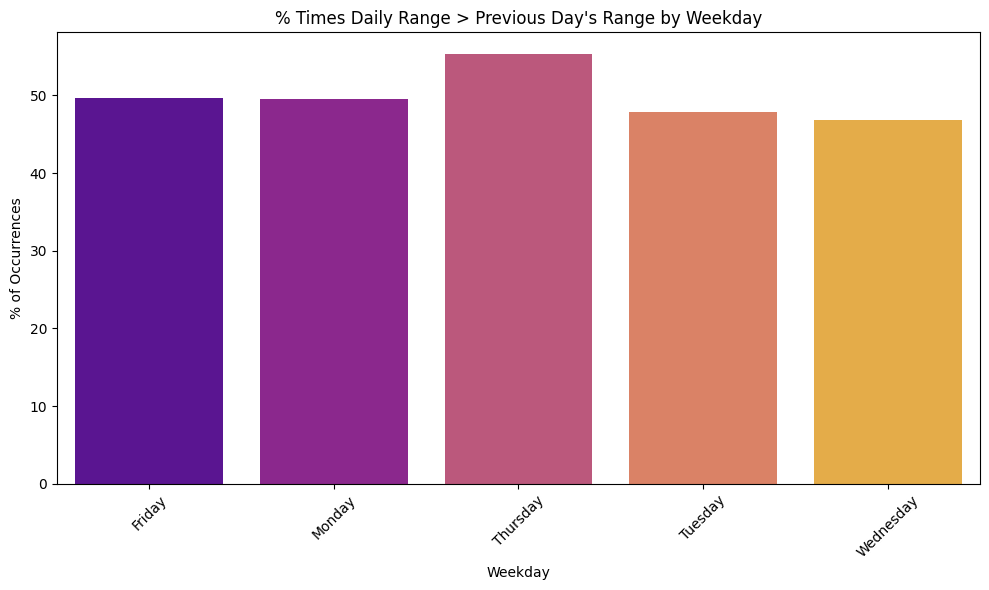

In [67]:
# 7. % of times each weekday > previous day's range
range_vs_prev_by_day = df.groupby('WeekdayName')['RangeVsPrev'].mean() * 100
print("\n7. % Times Each Weekday > Previous Day's Range:")
print(range_vs_prev_by_day.round(2))
plt.figure(figsize=(10, 6))
sns.barplot(x=range_vs_prev_by_day.index, y=range_vs_prev_by_day.values, palette='plasma')
plt.title('% Times Daily Range > Previous Day\'s Range by Weekday')
plt.xlabel('Weekday')
plt.ylabel('% of Occurrences')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


8. Day with Most Inside Bars: Wednesday (77 occurrences)


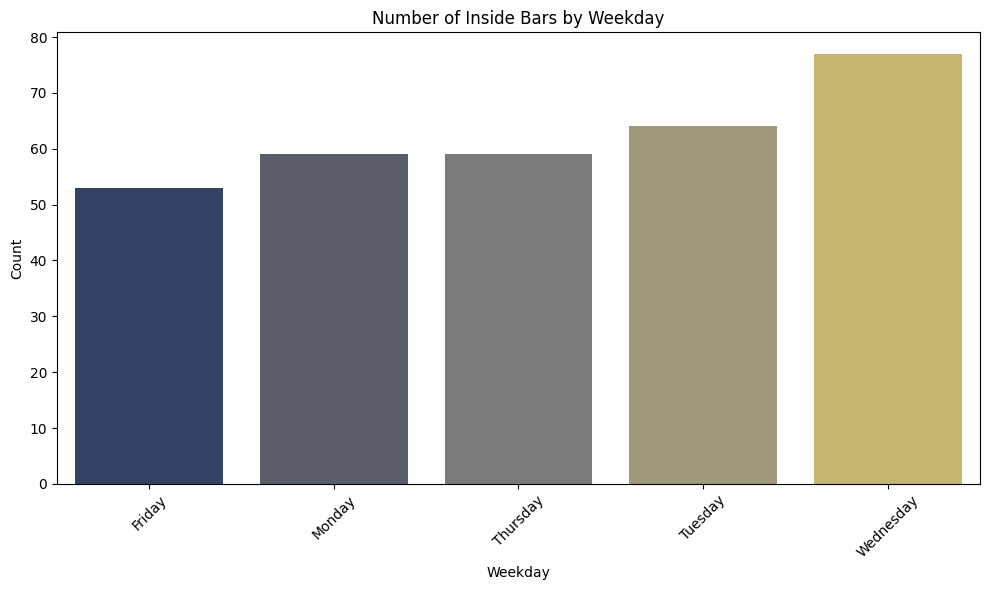

In [68]:
# 8. Day with most inside bars
inside_bars_by_day = df.groupby('WeekdayName')['InsideBar'].sum()
most_inside_bars_day = inside_bars_by_day.idxmax()
print(f"\n8. Day with Most Inside Bars: {most_inside_bars_day} ({int(inside_bars_by_day.max())} occurrences)")
plt.figure(figsize=(10, 6))
sns.barplot(x=inside_bars_by_day.index, y=inside_bars_by_day.values, palette='cividis')
plt.title('Number of Inside Bars by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [69]:
# 9. Day with most gap-ups
gap_ups_by_day = df.groupby('WeekdayName')['GapUp'].sum()
most_gap_ups_day = gap_ups_by_day.idxmax()
print(f"\n9. Day with Most Gap-Ups: {most_gap_ups_day} ({int(gap_ups_by_day.max())} occurrences)")



9. Day with Most Gap-Ups: Tuesday (229 occurrences)


In [70]:
# 10. Day with most gap-downs
gap_downs_by_day = df.groupby('WeekdayName')['GapDown'].sum()
most_gap_downs_day = gap_downs_by_day.idxmax()
print(f"\n10. Day with Most Gap-Downs: {most_gap_downs_day} ({int(gap_downs_by_day.max())} occurrences)")



10. Day with Most Gap-Downs: Wednesday (300 occurrences)


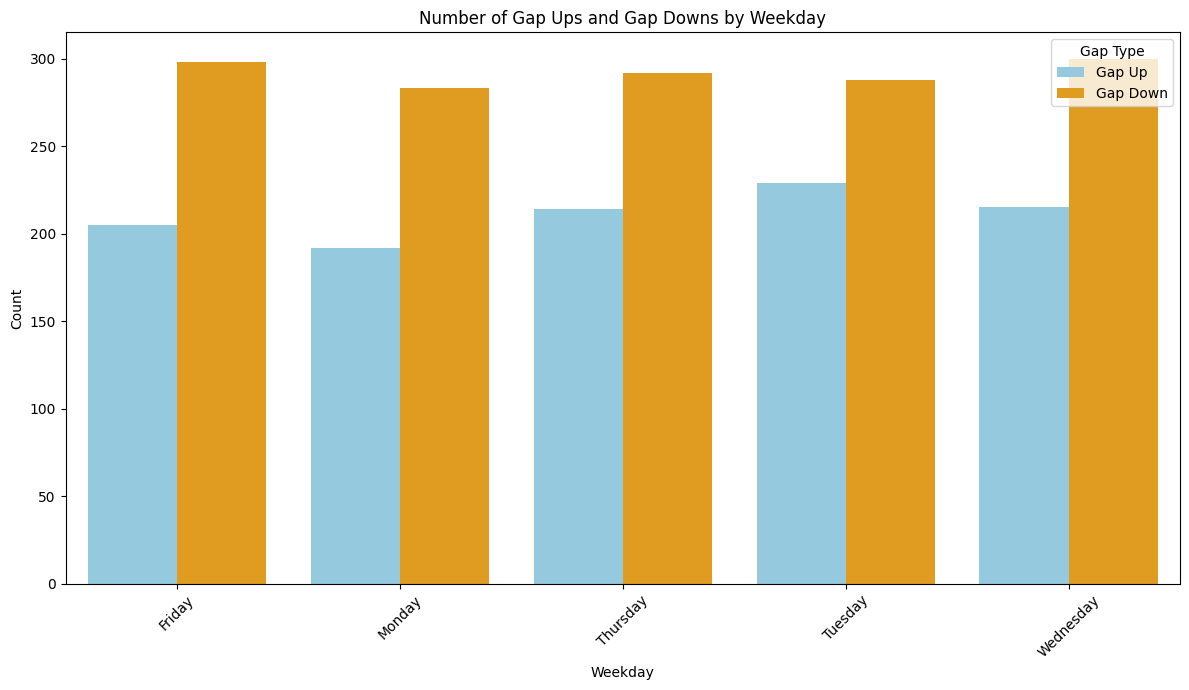

In [71]:
# Plotting gap counts
gap_counts_df = pd.DataFrame({
    'Gap Up': gap_ups_by_day,
    'Gap Down': gap_downs_by_day
}).reset_index()
gap_counts_melted = gap_counts_df.melt('WeekdayName', var_name='Gap Type', value_name='Count')

plt.figure(figsize=(12, 7))
sns.barplot(x='WeekdayName', y='Count', hue='Gap Type', data=gap_counts_melted, palette={'Gap Up': 'skyblue', 'Gap Down': 'orange'})
plt.title('Number of Gap Ups and Gap Downs by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gap Type')
plt.tight_layout()
plt.show()

11. % Time Tuesday Breaks Monday High: 60.17%
12. % Time Tuesday Breaks Monday Low: 40.47%


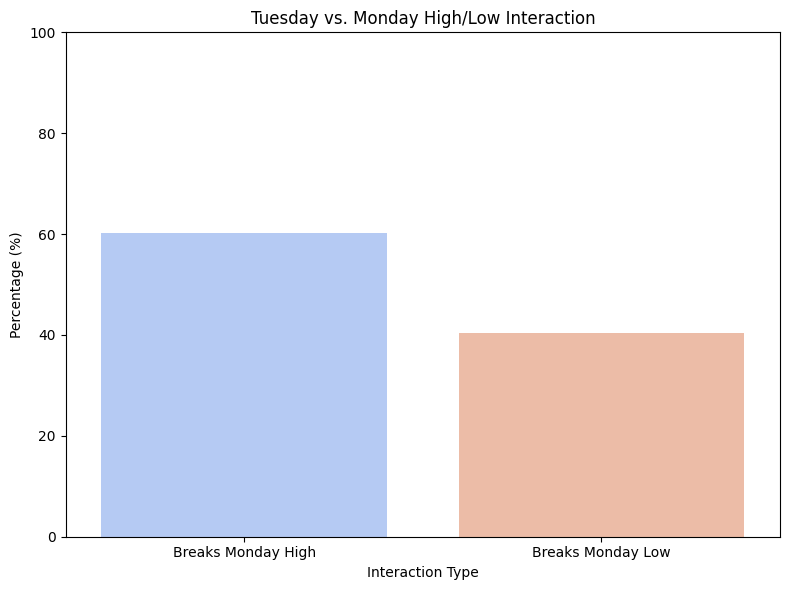


13. Average Weekly Return if Monday is Green: 0.91%
   Average Weekly Return if Monday is Red: -0.40%


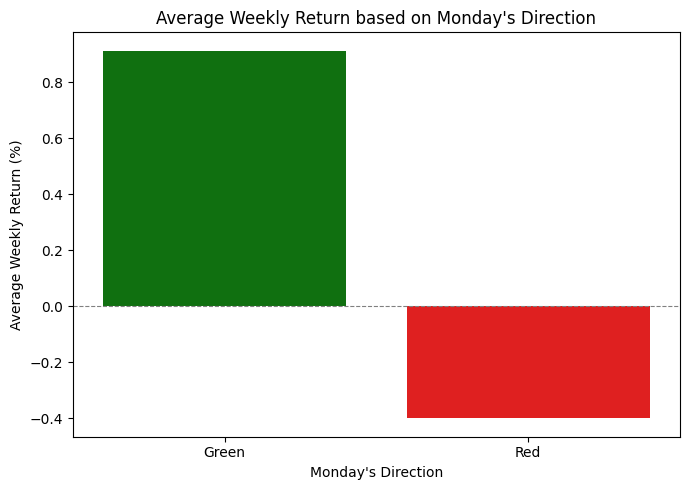

In [72]:
tm_df_list = []
df = df.sort_values('Parsed_Date').reset_index(drop=True)

for idx, row in df[df['WeekdayName'] == 'Tuesday'].iterrows():
    tuesday_date = row['Parsed_Date']
    # Find the preceding day's data
    monday_row = df[(df['Parsed_Date'] == tuesday_date - timedelta(days=1)) & (df['WeekdayName'] == 'Monday')]

    # Check if a corresponding Monday exists
    if not monday_row.empty:
        tm_df_list.append({
            'tuesday_date': tuesday_date,
            'monday_high': monday_row.iloc[0]['High'],
            'monday_low': monday_row.iloc[0]['Low'],
            'tuesday_high': row['High'],
            'tuesday_low': row['Low'],
        })

if tm_df_list:
    tm_df = pd.DataFrame(tm_df_list)

    # 11. % of time Tuesday breaks Monday high
    tuesday_breaks_monday_high = (tm_df['tuesday_high'] > tm_df['monday_high']).mean() * 100
    print(f"11. % Time Tuesday Breaks Monday High: {tuesday_breaks_monday_high:.2f}%")

    # 12. % of time Tuesday breaks Monday low
    tuesday_breaks_monday_low = (tm_df['tuesday_low'] < tm_df['monday_low']).mean() * 100
    print(f"12. % Time Tuesday Breaks Monday Low: {tuesday_breaks_monday_low:.2f}%")

    # Plotting Tuesday breaks
    tuesday_breaks_data = pd.DataFrame({
        'Category': ['Breaks Monday High', 'Breaks Monday Low'],
        'Percentage': [tuesday_breaks_monday_high, tuesday_breaks_monday_low]
    })
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Category', y='Percentage', data=tuesday_breaks_data, palette='coolwarm')
    plt.title('Tuesday vs. Monday High/Low Interaction')
    plt.xlabel('Interaction Type')
    plt.ylabel('Percentage (%)')
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

else:
    print("Not enough Monday-Tuesday pairs found for analysis.")

weekly_summary = []
for year_week in sorted(df['YearWeek'].unique()):
    week_data = df[df['YearWeek'] == year_week].copy()

    if not week_data.empty:
        monday_data_week = week_data[week_data['WeekdayName'] == 'Monday']

        if not monday_data_week.empty:
            monday_bullish = monday_data_week.iloc[0]['IsBullish']
            monday_open = monday_data_week.iloc[0]['Open']

            if not week_data.empty:
                last_day_of_week = week_data.sort_values('Parsed_Date').iloc[-1]
                weekly_return = ((last_day_of_week['Close'] - monday_open) / monday_open) * 100
            else:
                weekly_return = np.nan

            weekly_summary.append({
                'monday_bullish': monday_bullish,
                'weekly_return': weekly_return,
            })

if weekly_summary:
    weekly_df = pd.DataFrame(weekly_summary)
    weekly_df.dropna(subset=['weekly_return'], inplace=True)

    if not weekly_df.empty:
        # 13. Weekly returns based on Monday direction
        monday_green_weeks = weekly_df[weekly_df['monday_bullish'] == True]['weekly_return'].mean()
        monday_red_weeks = weekly_df[weekly_df['monday_bullish'] == False]['weekly_return'].mean()

        print(f"\n13. Average Weekly Return if Monday is Green: {monday_green_weeks:.2f}%")
        print(f"   Average Weekly Return if Monday is Red: {monday_red_weeks:.2f}%")

        weekly_return_data = pd.DataFrame({
            'Monday Direction': ['Green', 'Red'],
            'Average Weekly Return (%)': [monday_green_weeks, monday_red_weeks]
        })
        plt.figure(figsize=(7, 5))
        colors_return = ['green' if x > 0 else 'red' for x in weekly_return_data['Average Weekly Return (%)']]
        sns.barplot(x='Monday Direction', y='Average Weekly Return (%)', data=weekly_return_data, palette=colors_return)
        plt.title("Average Weekly Return based on Monday's Direction")
        plt.xlabel("Monday's Direction")
        plt.ylabel('Average Weekly Return (%)')
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough complete weekly data after cleaning for summary analysis.")
else:
    print("Not enough complete weekly data for summary analysis.")

14. Gap Reversal Probability: 73.61%
15. Gap >0.5% Continuation Probability: 20.17%
16. % of Gaps Filled by EOD: 48.65%


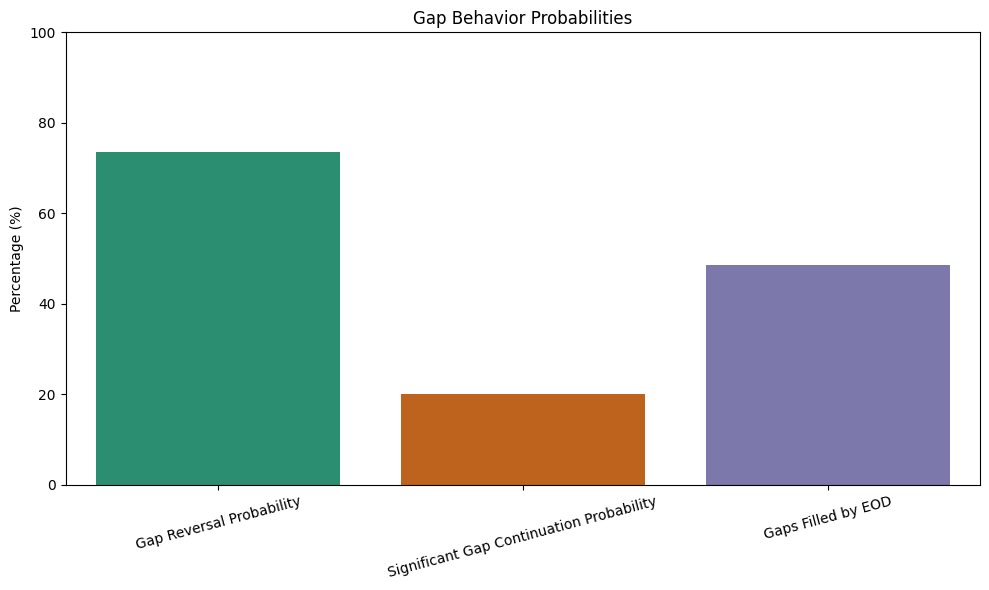

In [73]:
df_gaps = df.dropna(subset=['PrevClose', 'Open']).copy()

significant_gaps = abs(df_gaps['GapPercent']) > 0.5
gap_reversals = (df_gaps['GapUp'] & df_gaps['IsBearish']) | (df_gaps['GapDown'] & df_gaps['IsBullish'])
gap_continuation = (df_gaps['GapUp'] & df_gaps['IsBullish']) | (df_gaps['GapDown'] & df_gaps['IsBearish'])

total_gaps = df_gaps['GapUp'].sum() + df_gaps['GapDown'].sum()
gap_reversal_prob = 0
if total_gaps > 0:
    gap_reversal_prob = (gap_reversals.sum() / total_gaps)*100
    print(f"14. Gap Reversal Probability: {gap_reversal_prob:.2f}%")
else:
    print("14. No gaps found for reversal probability analysis.")

gap_continuation_prob = 0
if significant_gaps.sum() > 0:
    gap_continuation_prob = (gap_continuation & significant_gaps).sum() / significant_gaps.sum()*100
    print(f"15. Gap >0.5% Continuation Probability: {gap_continuation_prob:.2f}%")
else:
    print("15. No significant gaps found for continuation probability analysis.")

df_gaps['GapFilled'] = ((df_gaps['GapUp']) & (df_gaps['Low'] <= df_gaps['PrevClose'])) | \
                       ((df_gaps['GapDown']) & (df_gaps['High'] >= df_gaps['PrevClose']))
gap_fill_pct = 0
if total_gaps > 0:
    gap_fill_pct = df_gaps['GapFilled'].sum() / total_gaps * 100
    print(f"16. % of Gaps Filled by EOD: {gap_fill_pct:.2f}%")
else:
    print("16. No gaps found for gap fill analysis.")

# Plotting gap statistics
gap_stats_data = pd.DataFrame({
    'Metric': ['Gap Reversal Probability', 'Significant Gap Continuation Probability', 'Gaps Filled by EOD'],
    'Percentage': [gap_reversal_prob, gap_continuation_prob, gap_fill_pct]
})
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Percentage', data=gap_stats_data, palette='Dark2')
plt.title('Gap Behavior Probabilities')
plt.xlabel('')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Initial data preprocessing complete. Head of df_analysis:
         Date     Open     High      Low    Close Parsed_Date        Day  \
6  2014-06-25  3792.25  3823.50  3783.00  3814.75  2014-06-25  Wednesday   
7  2014-06-26  3812.75  3822.00  3789.00  3817.50  2014-06-26   Thursday   
8  2014-06-27  3817.00  3837.75  3808.00  3831.50  2014-06-27     Friday   
9  2014-06-30  3831.50  3851.25  3827.75  3840.50  2014-06-30     Monday   
10 2014-07-01  3846.25  3894.50  3844.75  3884.75  2014-07-01    Tuesday   

    Weekday WeekdayName  Range  ...  Week  Year  YearWeek  Next Day Open  \
6         2   Wednesday  40.50  ...    26  2014  2014-W26        3812.75   
7         3    Thursday  33.00  ...    26  2014  2014-W26        3817.00   
8         4      Friday  29.75  ...    26  2014  2014-W26        3831.50   
9         0      Monday  23.50  ...    27  2014  2014-W27        3846.25   
10        1     Tuesday  49.75  ...    27  2014  2014-W27        3885.50   

    Next Day Close  Next Day

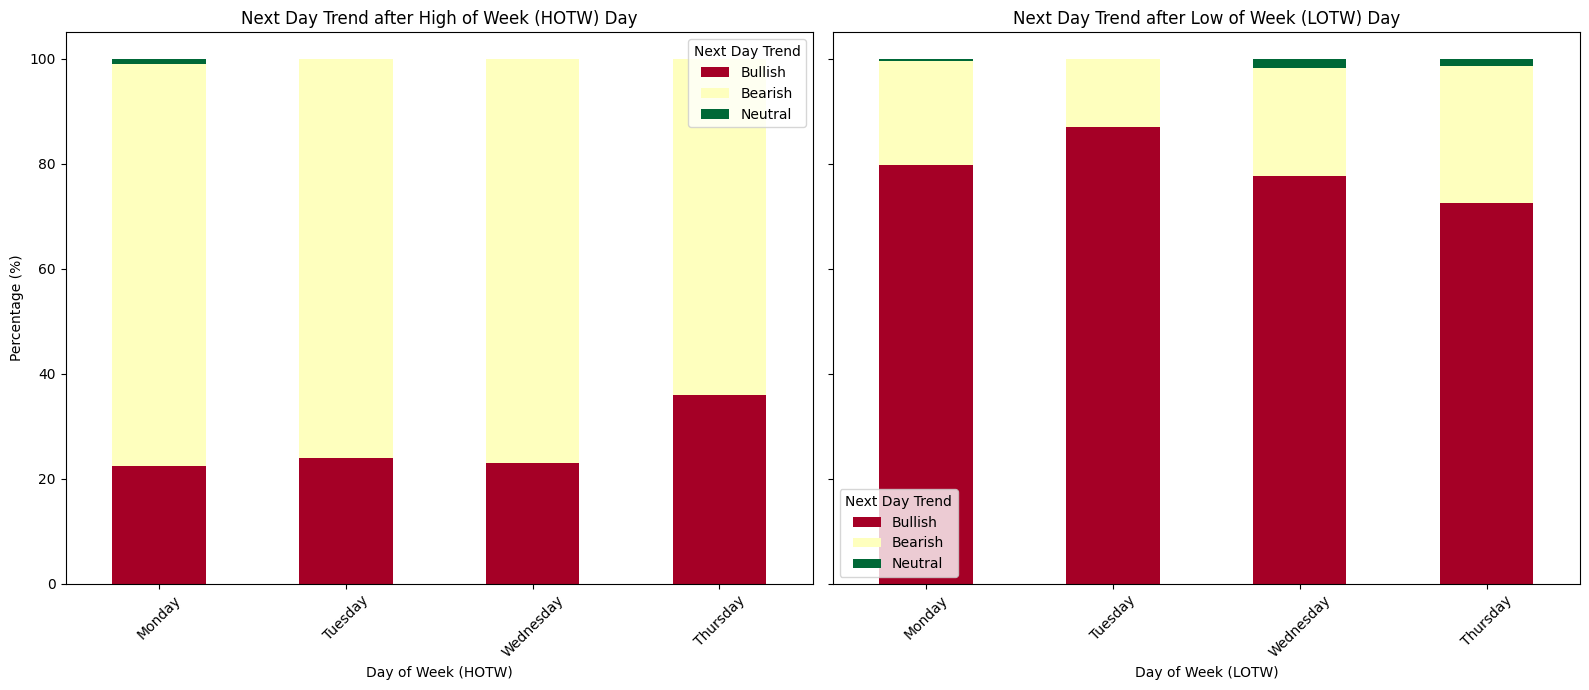

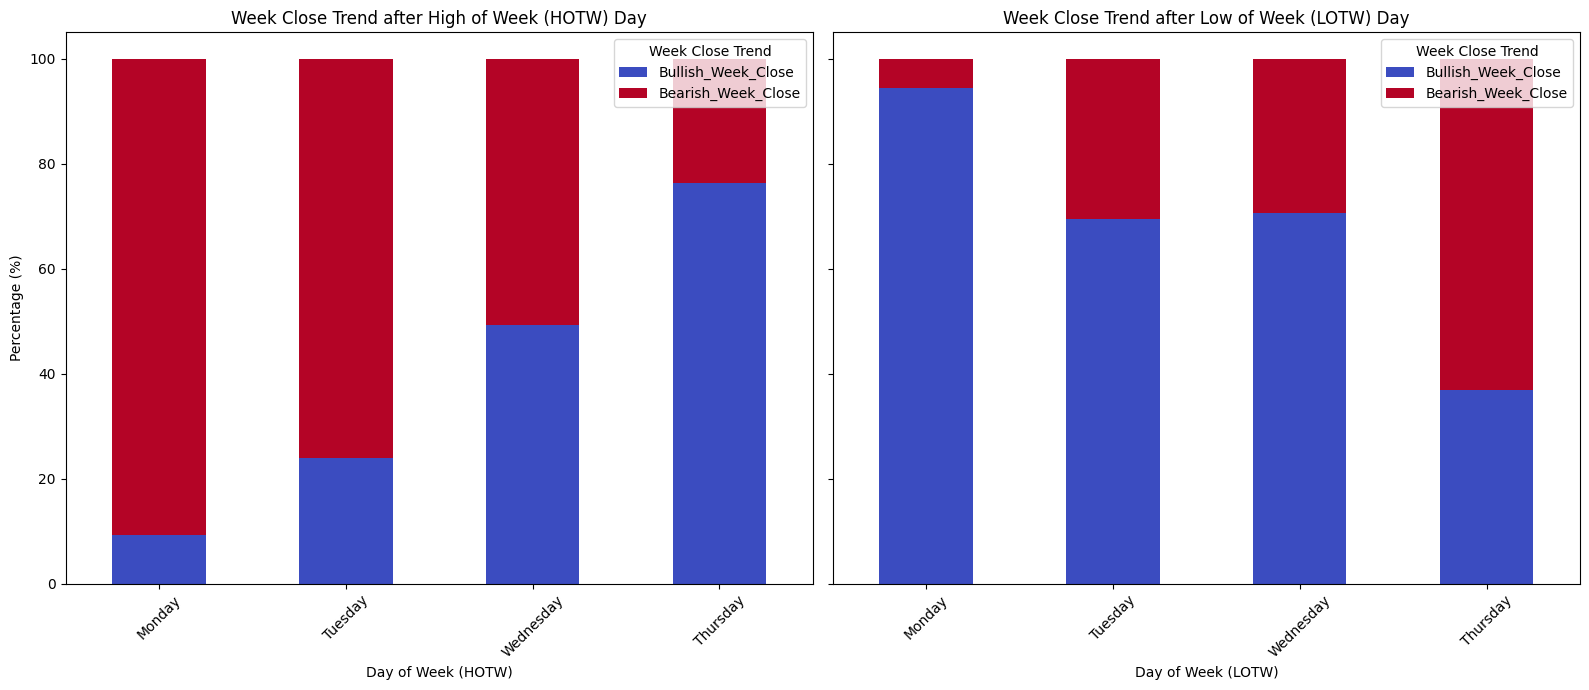


Analysis complete!


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate


AVG_EXPANSION_WINDOW = 7


try:
    required_columns = ['Date', 'Open', 'High', 'Low', 'Close']
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"Missing required columns: {missing_columns}")
except NameError:
    raise NameError("DataFrame 'df' is not defined. Please load your data first.")

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

df['Next Day Open'] = df['Open'].shift(-1)
df['Next Day Close'] = df['Close'].shift(-1)
df['Next Day Trend'] = 'Neutral'
df.loc[df['Next Day Close'] > df['Next Day Open'], 'Next Day Trend'] = 'Bullish'
df.loc[df['Next Day Close'] < df['Next Day Open'], 'Next Day Trend'] = 'Bearish'


df['Expansion'] = df['High'] - df['Low']
df['Avg_Expansion'] = df['Expansion'].rolling(window=AVG_EXPANSION_WINDOW).mean()


df['DayOfWeekNum'] = df['Date'].dt.dayofweek
df['DayOfWeek'] = df['Date'].dt.day_name()


df_analysis = df.dropna(subset=['Next Day Open', 'Next Day Close', 'Avg_Expansion']).copy()

print("Initial data preprocessing complete. Head of df_analysis:")
print(df_analysis.head())
print("\n")


def calculate_weekly_metrics(data_frame):
    """Calculates weekly high, low, open, close and merges back to daily df."""
    df_temp = data_frame.copy()


    df_temp['Year_Week'] = df_temp['Date'].dt.to_period('W')


    weekly_summary = df_temp.groupby('Year_Week').agg({
        'High': 'max',
        'Low': 'min',
        'Open': 'first',
        'Close': 'last'
    }).rename(columns={
        'High': 'Weekly_High',
        'Low': 'Weekly_Low',
        'Open': 'Weekly_Open',
        'Close': 'Weekly_Close'
    })


    df_merged = pd.merge(df_temp, weekly_summary, left_on='Year_Week', right_index=True, how='left')


    df_merged['Is_HOTW'] = (df_merged['High'] == df_merged['Weekly_High'])
    df_merged['Is_LOTW'] = (df_merged['Low'] == df_merged['Weekly_Low'])


    df_merged['Is_HOTW'] = df_merged['Is_HOTW'].fillna(False)
    df_merged['Is_LOTW'] = df_merged['Is_LOTW'].fillna(False)

    return df_merged

df_analysis = calculate_weekly_metrics(df_analysis)

print("Weekly metrics calculated and merged. Head of df_analysis with weekly data:")
print(df_analysis[['Date', 'High', 'Low', 'Is_HOTW', 'Is_LOTW', 'Weekly_High', 'Weekly_Low']].head())
print("\n")


def get_next_day_trend_pct(data_subset):
    """Calculates % chance next day is bullish/bearish/neutral."""
    if data_subset.empty:
        return {'Bullish': 0, 'Bearish': 0, 'Neutral': 0}
    counts = data_subset['Next Day Trend'].value_counts(normalize=True) * 100
    return {
        'Bullish': counts.get('Bullish', 0),
        'Bearish': counts.get('Bearish', 0),
        'Neutral': counts.get('Neutral', 0)
    }

def get_next_day_close_comparison_pct(data_subset, comparison_type, full_df_for_next_day):
    """Calculates % chance next day closes above/below reference day high/low."""
    if data_subset.empty:
        return 0

    comparison_count = 0
    total_count = 0

    for idx, row in data_subset.iterrows():

        current_date = row['Date']
        next_day_data = full_df_for_next_day[full_df_for_next_day['Date'] > current_date]

        if not next_day_data.empty:
            next_day_close = next_day_data.iloc[0]['Close']
            total_count += 1

            if comparison_type == 'above_high' and next_day_close > row['High']:
                comparison_count += 1
            elif comparison_type == 'below_low' and next_day_close < row['Low']:
                comparison_count += 1

    return (comparison_count / total_count) * 100 if total_count > 0 else 0

def get_week_close_trend_pct(data_subset, trend_type):
    """Calculates % chance week containing reference day closes bullish/bearish."""
    if data_subset.empty:
        return 0


    unique_weeks = data_subset.drop_duplicates(subset=['Year_Week'])

    if trend_type == 'bullish':
        trend_weeks = (unique_weeks['Weekly_Close'] > unique_weeks['Weekly_Open']).sum()
    elif trend_type == 'bearish':
        trend_weeks = (unique_weeks['Weekly_Close'] < unique_weeks['Weekly_Open']).sum()
    else:
        return 0

    return (trend_weeks / len(unique_weeks)) * 100 if len(unique_weeks) > 0 else 0

def get_week_close_vs_reference_pct(data_subset, comparison_type):
    """Calculates % chance week closes above HOTW close / below LOTW close."""
    if data_subset.empty:
        return 0

    unique_weeks = data_subset.drop_duplicates(subset=['Year_Week'])

    if comparison_type == 'above_hotw_close':
        compare_weeks = (unique_weeks['Weekly_Close'] > unique_weeks['Close']).sum()
    elif comparison_type == 'below_lotw_close':
        compare_weeks = (unique_weeks['Weekly_Close'] < unique_weeks['Close']).sum()
    else:
        return 0

    return (compare_weeks / len(unique_weeks)) * 100 if len(unique_weeks) > 0 else 0

def get_avg_days_until_taken_out(data_subset, breakout_type, full_df_for_lookup):
    """Calculates average number of trading days until HOTW/LOTW is taken out."""
    if data_subset.empty:
        return np.nan

    days_to_take_out = []

    for idx, row in data_subset.iterrows():
        current_date = row['Date']
        future_data = full_df_for_lookup[full_df_for_lookup['Date'] > current_date].copy()

        if future_data.empty:
            continue

        days_count = 0
        for _, future_row in future_data.iterrows():
            days_count += 1

            if breakout_type == 'hotw' and future_row['Close'] > row['High']:
                days_to_take_out.append(days_count)
                break
            elif breakout_type == 'lotw' and future_row['Close'] < row['Low']:
                days_to_take_out.append(days_count)
                break

    return np.mean(days_to_take_out) if days_to_take_out else np.nan


analysis_results = []
print("--- Performing Detailed Analysis for HOTW / LOTW Days ---")


target_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']

for day_name in target_weekdays:

    hotw_days_for_day = df_analysis[(df_analysis['DayOfWeek'] == day_name) & (df_analysis['Is_HOTW'])].copy()

    if not hotw_days_for_day.empty:
        next_day_trend_hotw = get_next_day_trend_pct(hotw_days_for_day)
        next_day_below_low_hotw = get_next_day_close_comparison_pct(hotw_days_for_day, 'below_low', df_analysis)
        next_day_above_high_hotw = get_next_day_close_comparison_pct(hotw_days_for_day, 'above_high', df_analysis)
        week_closes_bearish_hotw = get_week_close_trend_pct(hotw_days_for_day, 'bearish')
        week_closes_above_hotw_close = get_week_close_vs_reference_pct(hotw_days_for_day, 'above_hotw_close')
        avg_days_take_out_hotw = get_avg_days_until_taken_out(hotw_days_for_day, 'hotw', df_analysis)
    else:

        next_day_trend_hotw = {'Bullish': 0, 'Bearish': 0, 'Neutral': 0}
        next_day_below_low_hotw = 0
        next_day_above_high_hotw = 0
        week_closes_bearish_hotw = 0
        week_closes_above_hotw_close = 0
        avg_days_take_out_hotw = np.nan

    analysis_results.append({
        'Reference Day': day_name,
        'Type': 'HOTW',
        'Count': len(hotw_days_for_day),
        '% Next Day Bearish': f"{next_day_trend_hotw['Bearish']:.2f}%",
        '% Next Day Bullish': f"{next_day_trend_hotw['Bullish']:.2f}%",
        '% Next Day Closes Below Ref Day Low': f"{next_day_below_low_hotw:.2f}%",
        '% Next Day Closes Above Ref Day High': f"{next_day_above_high_hotw:.2f}%",
        '% Week Closes Bearish': f"{week_closes_bearish_hotw:.2f}%",
        '% Week Closes Above HOTW Close': f"{week_closes_above_hotw_close:.2f}%",
        'Avg Days Until Taken Out': f"{avg_days_take_out_hotw:.2f}" if not pd.isna(avg_days_take_out_hotw) else 'N/A'
    })

    lotw_days_for_day = df_analysis[(df_analysis['DayOfWeek'] == day_name) & (df_analysis['Is_LOTW'])].copy()

    if not lotw_days_for_day.empty:
        next_day_trend_lotw = get_next_day_trend_pct(lotw_days_for_day)
        next_day_above_high_lotw = get_next_day_close_comparison_pct(lotw_days_for_day, 'above_high', df_analysis)
        next_day_below_low_lotw = get_next_day_close_comparison_pct(lotw_days_for_day, 'below_low', df_analysis)
        week_closes_bullish_lotw = get_week_close_trend_pct(lotw_days_for_day, 'bullish')
        week_closes_below_lotw_close = get_week_close_vs_reference_pct(lotw_days_for_day, 'below_lotw_close')
        avg_days_take_out_lotw = get_avg_days_until_taken_out(lotw_days_for_day, 'lotw', df_analysis)
    else:

        next_day_trend_lotw = {'Bullish': 0, 'Bearish': 0, 'Neutral': 0}
        next_day_above_high_lotw = 0
        next_day_below_low_lotw = 0
        week_closes_bullish_lotw = 0
        week_closes_below_lotw_close = 0
        avg_days_take_out_lotw = np.nan

    analysis_results.append({
        'Reference Day': day_name,
        'Type': 'LOTW',
        'Count': len(lotw_days_for_day),
        '% Next Day Bearish': f"{next_day_trend_lotw['Bearish']:.2f}%",
        '% Next Day Bullish': f"{next_day_trend_lotw['Bullish']:.2f}%",
        '% Next Day Closes Below Ref Day Low': f"{next_day_below_low_lotw:.2f}%",
        '% Next Day Closes Above Ref Day High': f"{next_day_above_high_lotw:.2f}%",
        '% Week Closes Bullish': f"{week_closes_bullish_lotw:.2f}%",
        '% Week Closes Below LOTW Close': f"{week_closes_below_lotw_close:.2f}%",
        'Avg Days Until Taken Out': f"{avg_days_take_out_lotw:.2f}" if not pd.isna(avg_days_take_out_lotw) else 'N/A'
    })

hotw_results = []
lotw_results = []

for result in analysis_results:
    if result['Type'] == 'HOTW':
        hotw_results.append({
            'Day': result['Reference Day'],
            'Count': result['Count'],
            'Next Day ↗️': result['% Next Day Bullish'],
            'Next Day ↘️': result['% Next Day Bearish'],
            'Close > High': result['% Next Day Closes Above Ref Day High'],
            'Close < Low': result['% Next Day Closes Below Ref Day Low'],
            'Week ↘️': result['% Week Closes Bearish'],
            'Week > HOTW': result['% Week Closes Above HOTW Close'],
            'Days to Break': result['Avg Days Until Taken Out']
        })
    else:
        lotw_results.append({
            'Day': result['Reference Day'],
            'Count': result['Count'],
            'Next Day ↗️': result['% Next Day Bullish'],
            'Next Day ↘️': result['% Next Day Bearish'],
            'Close > High': result['% Next Day Closes Above Ref Day High'],
            'Close < Low': result['% Next Day Closes Below Ref Day Low'],
            'Week ↗️': result['% Week Closes Bullish'],
            'Week < LOTW': result['% Week Closes Below LOTW Close'],
            'Days to Break': result['Avg Days Until Taken Out']
        })


hotw_df = pd.DataFrame(hotw_results)
lotw_df = pd.DataFrame(lotw_results)

print("\n" + "="*80)
print("📈 HIGH OF THE WEEK (HOTW) ANALYSIS")
print("="*80)
print("What happens after a day makes the weekly high?")
print("-" * 50)
print(tabulate(hotw_df, headers='keys', tablefmt='pretty', showindex=False))

print("\n📉 Insights for HOTW:")
for _, row in hotw_df.iterrows():
    if row['Count'] > 0:
        day = row['Day']
        next_bearish = float(row['Next Day ↘️'].replace('%', ''))
        week_bearish = float(row['Week ↘️'].replace('%', ''))
        close_below = float(row['Close < Low'].replace('%', ''))

        print(f"• {day} HOTW: {next_bearish:.0f}% chance next day bearish, "
              f"{close_below:.0f}% chance close below HOTW low, "
              f"{week_bearish:.0f}% chance week ends bearish")

print("\n" + "="*80)
print("📉 LOW OF THE WEEK (LOTW) ANALYSIS")
print("="*80)
print("What happens after a day makes the weekly low?")
print("-" * 50)
print(tabulate(lotw_df, headers='keys', tablefmt='pretty', showindex=False))

print("\n📈 Insights for LOTW:")
for _, row in lotw_df.iterrows():
    if row['Count'] > 0:
        day = row['Day']
        next_bullish = float(row['Next Day ↗️'].replace('%', ''))
        week_bullish = float(row['Week ↗️'].replace('%', ''))
        close_above = float(row['Close > High'].replace('%', ''))

        print(f"• {day} LOTW: {next_bullish:.0f}% chance next day bullish, "
              f"{close_above:.0f}% chance close above LOTW high, "
              f"{week_bullish:.0f}% chance week ends bullish")


print("\n" + "="*80)
print("📊 TRADING STRATEGY INSIGHTS")
print("="*80)


hotw_reversal_rates = []
lotw_reversal_rates = []

for _, row in hotw_df.iterrows():
    if row['Count'] > 0:
        reversal_rate = float(row['Next Day ↘️'].replace('%', ''))
        hotw_reversal_rates.append((row['Day'], reversal_rate))

for _, row in lotw_df.iterrows():
    if row['Count'] > 0:
        reversal_rate = float(row['Next Day ↗️'].replace('%', ''))
        lotw_reversal_rates.append((row['Day'], reversal_rate))

if hotw_reversal_rates:
    best_hotw_reversal = max(hotw_reversal_rates, key=lambda x: x[1])
    worst_hotw_reversal = min(hotw_reversal_rates, key=lambda x: x[1])
    print(f"HOTW Reversals: {best_hotw_reversal[0]} has highest reversal rate ({best_hotw_reversal[1]:.0f}%)")
    print(f"HOTW Continuation: {worst_hotw_reversal[0]} has lowest reversal rate ({worst_hotw_reversal[1]:.0f}%)")

if lotw_reversal_rates:
    best_lotw_reversal = max(lotw_reversal_rates, key=lambda x: x[1])
    worst_lotw_reversal = min(lotw_reversal_rates, key=lambda x: x[1])
    print(f"LOTW Reversals: {best_lotw_reversal[0]} has highest reversal rate ({best_lotw_reversal[1]:.0f}%)")
    print(f"LOTW Continuation: {worst_lotw_reversal[0]} has lowest reversal rate ({worst_lotw_reversal[1]:.0f}%)")



print("\n--- Generating Visualizations ---")


if not df_analysis[df_analysis['Is_HOTW'] | df_analysis['Is_LOTW']].empty:
    try:

        fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)


        hotw_data = df_analysis[df_analysis['Is_HOTW'] & df_analysis['DayOfWeek'].isin(target_weekdays)]
        if not hotw_data.empty:
            hotw_next_day_trends = hotw_data.groupby('DayOfWeek')['Next Day Trend'].value_counts(normalize=True).unstack(fill_value=0) * 100
            expected_cols = ['Bullish', 'Bearish', 'Neutral']
            for col in expected_cols:
                if col not in hotw_next_day_trends.columns:
                    hotw_next_day_trends[col] = 0
            hotw_next_day_trends = hotw_next_day_trends.reindex(target_weekdays, fill_value=0)
            hotw_next_day_trends[expected_cols].plot(kind='bar', stacked=True, ax=axes[0], colormap='RdYlGn')

        axes[0].set_title('Next Day Trend after High of Week (HOTW) Day')
        axes[0].set_ylabel('Percentage (%)')
        axes[0].set_xlabel('Day of Week (HOTW)')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].legend(title='Next Day Trend')


        lotw_data = df_analysis[df_analysis['Is_LOTW'] & df_analysis['DayOfWeek'].isin(target_weekdays)]
        if not lotw_data.empty:
            lotw_next_day_trends = lotw_data.groupby('DayOfWeek')['Next Day Trend'].value_counts(normalize=True).unstack(fill_value=0) * 100
            for col in expected_cols:
                if col not in lotw_next_day_trends.columns:
                    lotw_next_day_trends[col] = 0
            lotw_next_day_trends = lotw_next_day_trends.reindex(target_weekdays, fill_value=0)
            lotw_next_day_trends[expected_cols].plot(kind='bar', stacked=True, ax=axes[1], colormap='RdYlGn')

        axes[1].set_title('Next Day Trend after Low of Week (LOTW) Day')
        axes[1].set_ylabel('Percentage (%)')
        axes[1].set_xlabel('Day of Week (LOTW)')
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].legend(title='Next Day Trend')

        plt.tight_layout()
        plt.savefig('next_day_trend_hotw_lotw_by_weekday.png', dpi=300, bbox_inches='tight')
        plt.show()


        fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)


        if not hotw_data.empty:
            hotw_week_data = hotw_data.drop_duplicates(subset=['Year_Week', 'DayOfWeek'])
            hotw_week_trends = hotw_week_data.groupby('DayOfWeek').apply(
                lambda x: pd.Series({
                    'Bullish_Week_Close': (x['Weekly_Close'] > x['Weekly_Open']).mean() * 100,
                    'Bearish_Week_Close': (x['Weekly_Close'] < x['Weekly_Open']).mean() * 100
                })
            ).fillna(0)
            hotw_week_trends = hotw_week_trends.reindex(target_weekdays, fill_value=0)
            hotw_week_trends[['Bullish_Week_Close', 'Bearish_Week_Close']].plot(kind='bar', stacked=True, ax=axes[0], colormap='coolwarm')

        axes[0].set_title('Week Close Trend after High of Week (HOTW) Day')
        axes[0].set_ylabel('Percentage (%)')
        axes[0].set_xlabel('Day of Week (HOTW)')
        axes[0].tick_params(axis='x', rotation=45)
        axes[0].legend(title='Week Close Trend')


        if not lotw_data.empty:
            lotw_week_data = lotw_data.drop_duplicates(subset=['Year_Week', 'DayOfWeek'])
            lotw_week_trends = lotw_week_data.groupby('DayOfWeek').apply(
                lambda x: pd.Series({
                    'Bullish_Week_Close': (x['Weekly_Close'] > x['Weekly_Open']).mean() * 100,
                    'Bearish_Week_Close': (x['Weekly_Close'] < x['Weekly_Open']).mean() * 100
                })
            ).fillna(0)
            lotw_week_trends = lotw_week_trends.reindex(target_weekdays, fill_value=0)
            lotw_week_trends[['Bullish_Week_Close', 'Bearish_Week_Close']].plot(kind='bar', stacked=True, ax=axes[1], colormap='coolwarm')

        axes[1].set_title('Week Close Trend after Low of Week (LOTW) Day')
        axes[1].set_ylabel('Percentage (%)')
        axes[1].set_xlabel('Day of Week (LOTW)')
        axes[1].tick_params(axis='x', rotation=45)
        axes[1].legend(title='Week Close Trend')

        plt.tight_layout()
        plt.savefig('week_close_trend_hotw_lotw_by_weekday.png', dpi=300, bbox_inches='tight')
        plt.show()

    except Exception as e:
        print(f"Error creating visualizations: {e}")
        print("Continuing without visualizations...")

else:
    print("No HOTW/LOTW data found for visualization.")

print("\nAnalysis complete!")

In [74]:
df['Weekday'] = df['Parsed_Date'].dt.dayofweek
df['WeekdayName'] = df['Parsed_Date'].dt.day_name()


df['Range'] = df['High'] - df['Low']
df['RangePercent'] = (df['Range'] / df['Open']) * 100
df['BodySize'] = abs(df['Close'] - df['Open'])
df['IsBullish'] = df['Close'] > df['Open']
df['IsBearish'] = df['Close'] < df['Open']
df['OpenClosePercent'] = ((df['Close'] - df['Open']) / df['Open']) * 100


df['PrevHigh'] = df['High'].shift(1)
df['PrevLow'] = df['Low'].shift(1)
df['PrevClose'] = df['Close'].shift(1)
df['PrevRange'] = df['Range'].shift(1)
df['PrevOpen'] = df['Open'].shift(1)


df['GapUp'] = df['Open'] > df['PrevClose']
df['GapDown'] = df['Open'] < df['PrevClose']
df['GapPercent'] = ((df['Open'] - df['PrevClose']) / df['PrevClose']) * 100


df['InsideBar'] = (df['High'] <= df['PrevHigh']) & (df['Low'] >= df['PrevLow'])
df['OutsideBar'] = (df['High'] > df['PrevHigh']) & (df['Low'] < df['PrevLow'])


df['RangeVsPrev'] = df['Range'] > df['PrevRange']


df['Week'] = df['Parsed_Date'].dt.isocalendar().week
df['Year'] = df['Parsed_Date'].dt.year
df['YearWeek'] = df['Year'].astype(str) + '-W' + df['Week'].astype(str).str.zfill(2) # zfill for consistent formatting


df.dropna(subset=['PrevClose', 'PrevHigh', 'PrevLow', 'PrevRange', 'PrevOpen'], inplace=True)
df.reset_index(drop=True, inplace=True)

df = df[df['Weekday'].isin([0, 1, 2, 3, 4])].copy()


print("\n--- df after initial cleaning and weekday filtering ---")
print(f"Shape of df: {df.shape}")
print("Head of df:")
print(df.head())
print("Info of df:")
df.info()
print("Value counts for WeekdayName in df:")
print(df['WeekdayName'].value_counts(dropna=False))


weekly_data_list = []

if not df.empty:
    for year_week, week_df in df.groupby('YearWeek'):

        monday_data = week_df[week_df['WeekdayName'] == 'Monday']
        if not monday_data.empty:
            monday_high = monday_data['High'].iloc[0]
            monday_low = monday_data['Low'].iloc[0]
            monday_open = monday_data['Open'].iloc[0]
            monday_close = monday_data['Close'].iloc[0]
            monday_range = monday_data['Range'].iloc[0]
            monday_bullish = monday_data['IsBullish'].iloc[0]
            monday_inside_bar = monday_data['InsideBar'].iloc[0]

            week_high = week_df['High'].max()
            week_low = week_df['Low'].min()
            week_range = week_high - week_low


            week_open = week_df[week_df['WeekdayName'] == 'Monday']['Open'].iloc[0] if not week_df[week_df['WeekdayName'] == 'Monday'].empty else np.nan
            week_close = week_df[week_df['WeekdayName'] == 'Friday']['Close'].iloc[0] if not week_df[week_df['WeekdayName'] == 'Friday'].empty else np.nan
            week_body_size = abs(week_close - week_open) if not np.isnan(week_open) and not np.isnan(week_close) else np.nan


            high_day = week_df.loc[week_df['High'].idxmax()]['WeekdayName'] if not week_df.empty else np.nan
            low_day = week_df.loc[week_df['Low'].idxmin()]['WeekdayName'] if not week_df.empty else np.nan


            friday_data = week_df[week_df['WeekdayName'] == 'Friday']
            friday_high = friday_data['High'].iloc[0] if not friday_data.empty else np.nan
            friday_low = friday_data['Low'].iloc[0] if not friday_data.empty else np.nan
            friday_close = friday_data['Close'].iloc[0] if not friday_data.empty else np.nan
            friday_range = friday_data['Range'].iloc[0] if not friday_data.empty else np.nan



            daily_data_in_week = {}
            for day_name in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
                day_row = week_df[week_df['WeekdayName'] == day_name]
                if not day_row.empty:
                    daily_data_in_week[day_name] = {
                        'Open': day_row['Open'].iloc[0],
                        'High': day_row['High'].iloc[0],
                        'Low': day_row['Low'].iloc[0],
                        'Close': day_row['Close'].iloc[0],
                        'IsBullish': day_row['IsBullish'].iloc[0],
                        'Range': day_row['Range'].iloc[0],
                        'InsideBar': day_row['InsideBar'].iloc[0],
                        'Weekday': day_row['Weekday'].iloc[0]
                    }
                else:
                        daily_data_in_week[day_name] = {
                            'Open': np.nan, 'High': np.nan, 'Low': np.nan, 'Close': np.nan,
                            'IsBullish': np.nan, 'Range': np.nan, 'InsideBar': np.nan, 'Weekday': np.nan
                        }

            weekly_data_list.append({
                'YearWeek': year_week,
                'Monday_High': monday_high,
                'Monday_Low': monday_low,
                'Monday_Open': monday_open,
                'Monday_Close': monday_close,
                'Monday_Range': monday_range,
                'Monday_IsBullish': monday_bullish,
                'Monday_InsideBar': monday_inside_bar,
                'Week_High': week_high,
                'Week_Low': week_low,
                'Week_Range': week_range,
                'Week_Open': week_open,
                'Week_Close': week_close,
                'Week_BodySize': week_body_size,
                'High_Day': high_day,
                'Low_Day': low_day,
                'Friday_High': friday_high,
                'Friday_Low': friday_low,
                'Friday_Close': friday_close,
                'Friday_Range': friday_range,
                'Daily_Data': daily_data_in_week
            })
else:
    print("Warning: 'df' is empty after filtering. No weekly analysis can be performed.")


weekly_analysis_df = pd.DataFrame(weekly_data_list).dropna(subset=['Week_Open', 'Week_Close', 'Monday_Open'])
if not weekly_analysis_df.empty:
    weekly_analysis_df['Week_IsBullish'] = weekly_analysis_df['Week_Close'] > weekly_analysis_df['Week_Open']
    weekly_analysis_df['Week_IsBearish'] = weekly_analysis_df['Week_Close'] < weekly_analysis_df['Week_Open']


print(f"Number of complete weeks for analysis: {weekly_analysis_df.shape[0]}")

weekly_analysis_df_with_friday = weekly_analysis_df.dropna(subset=['Friday_High', 'Friday_Low', 'Friday_Close'])


print("\n" + "="*70)
print("WEEKLY CONDITIONAL EXPANSION METRICS (New 100)")
print("="*70)

def get_day_data(week_row, day_name, metric):
    data = week_row['Daily_Data'].get(day_name)
    if data and metric in data and not np.isnan(data[metric]):
        return data[metric]
    return np.nan


def safe_percentage(numerator, denominator):
    return (numerator / denominator) * 100 if denominator > 0 else np.nan


print("\n**WHEN MONDAY IS HIGH OR LOW OF THE WEEK**")
print("-" * 60)

mon_how_weeks = weekly_analysis_df[weekly_analysis_df['High_Day'] == 'Monday']
mon_low_weeks = weekly_analysis_df[weekly_analysis_df['Low_Day'] == 'Monday']

# Avg weekly range when Monday is HoW
if not mon_how_weeks.empty:
    print(f"Avg weekly range when Monday is HoW: {mon_how_weeks['Week_Range'].mean():.2f}")
else: print("No weeks where Monday is HoW.")

# Avg weekly range when Monday is LoW
if not mon_low_weeks.empty:
    print(f"Avg weekly range when Monday is LoW: {mon_low_weeks['Week_Range'].mean():.2f}")
else: print("No weeks where Monday is LoW.")

# Avg Tuesday expansion when Monday is HoW
tue_exp_mon_how = [get_day_data(row, 'Tuesday', 'Range') for _, row in mon_how_weeks.iterrows()]
tue_exp_mon_how = [x for x in tue_exp_mon_how if not np.isnan(x)]
if tue_exp_mon_how:
    print(f"Avg Tuesday expansion when Monday is HoW: {np.mean(tue_exp_mon_how):.2f}")
else: print("No Tuesday expansion data when Monday is HoW.")

# Avg Tuesday expansion when Monday is LoW
tue_exp_mon_low = [get_day_data(row, 'Tuesday', 'Range') for _, row in mon_low_weeks.iterrows()]
tue_exp_mon_low = [x for x in tue_exp_mon_low if not np.isnan(x)]
if tue_exp_mon_low:
    print(f"Avg Tuesday expansion when Monday is LoW: {np.mean(tue_exp_mon_low):.2f}")
else: print("No Tuesday expansion data when Monday is LoW.")

# % of Tuesday closing above Monday when Monday is HoW
tue_close_above_mon_how_count = 0
total_mon_how_tues = 0
for _, row in mon_how_weeks.iterrows():
    tue_close = get_day_data(row, 'Tuesday', 'Close')
    mon_high = row['Monday_High']
    if not np.isnan(tue_close) and not np.isnan(mon_high):
        total_mon_how_tues += 1
        if tue_close > mon_high:
            tue_close_above_mon_how_count += 1
print(f"%-Tuesday closing above Monday when Monday is HoW: {safe_percentage(tue_close_above_mon_how_count, total_mon_how_tues):.2f}%")

# % of Tuesday reversing if Monday is HoW
# Tuesday reversing: Tuesday O-C opposite to Monday O-C
tue_rev_mon_how_count = 0
for _, row in mon_how_weeks.iterrows():
    mon_bull = row['Monday_IsBullish']
    tue_bull = get_day_data(row, 'Tuesday', 'IsBullish')
    if not np.isnan(mon_bull) and not np.isnan(tue_bull):
        # We already counted `total_mon_how_tues` above
        if mon_bull != tue_bull:
            tue_rev_mon_how_count += 1
print(f"%-Tuesday reversing if Monday is HoW: {safe_percentage(tue_rev_mon_how_count, total_mon_how_tues):.2f}%")


print(f"%-Full week bullish if Monday is HoW: {safe_percentage(mon_how_weeks['Week_IsBullish'].sum(), len(mon_how_weeks)):.2f}%")

fri_sweep_mon_how_count = 0
for _, row in mon_how_weeks.iterrows():
    fri_high = get_day_data(row, 'Friday', 'High')
    mon_high = row['Monday_High']
    if not np.isnan(fri_high) and not np.isnan(mon_high):
        if fri_high >= mon_high and row['High_Day'] == 'Monday': # Added explicit check to ensure Monday is still HoW
            fri_sweep_mon_how_count += 1

print(f"%-Friday (re)sweeping Monday High when Monday is HoW: {safe_percentage(fri_sweep_mon_how_count, len(mon_how_weeks)):.2f}%")


# Avg return from Monday High to Friday Close if Monday is HoW
returns_mon_high_to_fri_close = []
for _, row in mon_how_weeks.iterrows():
    mon_high = row['Monday_High']
    fri_close = get_day_data(row, 'Friday', 'Close')
    if not np.isnan(mon_high) and not np.isnan(fri_close) and mon_high != 0:
        returns_mon_high_to_fri_close.append(((fri_close - mon_high) / mon_high) * 100)
if returns_mon_high_to_fri_close:
    print(f"Avg return from Monday High to Friday Close if Monday is HoW: {np.mean(returns_mon_high_to_fri_close):.2f}%")
else: print("No return data for Monday HoW to Friday Close.")

# Avg return from Monday Low to Friday Close if Monday is LoW (NEWLY ADDED)
returns_mon_low_to_fri_close = []
for _, row in mon_low_weeks.iterrows():
    mon_low = row['Monday_Low']
    fri_close = get_day_data(row, 'Friday', 'Close')
    if not np.isnan(mon_low) and not np.isnan(fri_close) and mon_low != 0:
        returns_mon_low_to_fri_close.append(((fri_close - mon_low) / mon_low) * 100)
if returns_mon_low_to_fri_close:
    print(f"Avg return from Monday Low to Friday Close if Monday is LoW: {np.mean(returns_mon_low_to_fri_close):.2f}%")
else: print("No return data for Monday LoW to Friday Close.")


# % of weeks where Monday is HoW and Tuesday is LoW
mon_how_tue_low_count = ((weekly_analysis_df['High_Day'] == 'Monday') & (weekly_analysis_df['Low_Day'] == 'Tuesday')).sum()
print(f"%-Weeks where Monday is HoW and Tuesday is LoW: {safe_percentage(mon_how_tue_low_count, len(weekly_analysis_df)):.2f}%")


print("\n**WHEN TUESDAY IS HIGH OR LOW OF THE WEEK**")
print("-" * 60)

tue_how_weeks = weekly_analysis_df[weekly_analysis_df['High_Day'] == 'Tuesday']
tue_low_weeks = weekly_analysis_df[weekly_analysis_df['Low_Day'] == 'Tuesday']

# Avg Wednesday expansion if Tuesday is HoW
wed_exp_tue_how = [get_day_data(row, 'Wednesday', 'Range') for _, row in tue_how_weeks.iterrows()]
wed_exp_tue_how = [x for x in wed_exp_tue_how if not np.isnan(x)]
if wed_exp_tue_how:
    print(f"Avg Wednesday expansion if Tuesday is HoW: {np.mean(wed_exp_tue_how):.2f}")
else: print("No Wednesday expansion data if Tuesday is HoW.")


total_tue_how = len(tue_how_weeks)
for _, row in tue_how_weeks.iterrows():
    tue_high = get_day_data(row, 'Tuesday', 'High')
    thu_high = get_day_data(row, 'Thursday', 'High')
    if not np.isnan(tue_high) and not np.isnan(thu_high):
        if thu_high >= tue_high: # Reaches or exceeds
            thu_breaks_tue_high_how_count += 1
print(f"%-Thursday hitting/re-testing Tuesday High if Tuesday is HoW: {safe_percentage(thu_breaks_tue_high_how_count, total_tue_how):.2f}%")



fri_breaks_tue_low_tue_how_count = 0
for _, row in tue_how_weeks.iterrows():
    tue_low = get_day_data(row, 'Tuesday', 'Low')
    fri_low = get_day_data(row, 'Friday', 'Low')
    if not np.isnan(tue_low) and not np.isnan(fri_low):
        if fri_low < tue_low:
            fri_breaks_tue_low_tue_how_count += 1
print(f"%-Friday breaking Tuesday Low if Tuesday is HoW: {safe_percentage(fri_breaks_tue_low_tue_how_count, total_tue_how):.2f}%")



prev_week_ranges = weekly_analysis_df['Week_Range'].shift(1)
weeks_for_inside_check = weekly_analysis_df.copy()
weeks_for_inside_check['PrevWeek_Range'] = prev_week_ranges

inside_week_tue_how_count = 0
total_weeks_for_inside_check_tue_how = 0
for idx, row in tue_how_weeks.iterrows():
    curr_week_range = row['Week_Range']
    # Find previous week's data by YearWeek
    current_year_week_index = weekly_analysis_df.index.get_loc(idx)
    if current_year_week_index > 0: # Ensure there is a previous week
        prev_week_row = weekly_analysis_df.iloc[current_year_week_index - 1]
        prev_week_range = prev_week_row['Week_Range']

        if not np.isnan(curr_week_range) and not np.isnan(prev_week_range):
            total_weeks_for_inside_check_tue_how += 1
            if curr_week_range <= prev_week_range: # Simplified inside week definition
                inside_week_tue_how_count += 1
if total_weeks_for_inside_check_tue_how > 0:
    print(f"%-Inside week when Tuesday is HoW (current week range <= prev week range): {safe_percentage(inside_week_tue_how_count, total_weeks_for_inside_check_tue_how):.2f}%")
else: print("Not enough weeks to check inside week when Tuesday is HoW.")


# % of week closes below Tuesday if Tuesday is HoW
week_close_below_tue_how_count = 0
for _, row in tue_how_weeks.iterrows():
    tue_data = get_day_data(row, 'Tuesday', 'Close')
    week_close = row['Week_Close']
    if not np.isnan(tue_data) and not np.isnan(week_close):
        if week_close < tue_data:
            week_close_below_tue_how_count += 1
print(f"%-Week closes below Tuesday if Tuesday is HoW: {safe_percentage(week_close_below_tue_how_count, total_tue_how):.2f}%")


inside_day_after_tue_how_count = 0
total_tue_how_wed = 0
for _, row in tue_how_weeks.iterrows():
    tue_high = get_day_data(row, 'Tuesday', 'High')
    tue_low = get_day_data(row, 'Tuesday', 'Low')
    wed_high = get_day_data(row, 'Wednesday', 'High')
    wed_low = get_day_data(row, 'Wednesday', 'Low')
    if not any(np.isnan(x) for x in [tue_high, tue_low, wed_high, wed_low]):
        total_tue_how_wed += 1
        if (wed_high <= tue_high) and (wed_low >= tue_low):
            inside_day_after_tue_how_count += 1
print(f"%-Inside day after Tuesday HoW (Wednesday inside Tuesday): {safe_percentage(inside_day_after_tue_how_count, total_tue_how_wed):.2f}%")



rem_exp_tue_low = []
for _, row in tue_low_weeks.iterrows():
    wed_range = get_day_data(row, 'Wednesday', 'Range')
    thu_range = get_day_data(row, 'Thursday', 'Range')
    fri_range = get_day_data(row, 'Friday', 'Range')
    valid_ranges = [r for r in [wed_range, thu_range, fri_range] if not np.isnan(r)]
    if valid_ranges:
        rem_exp_tue_low.append(sum(valid_ranges))
if rem_exp_tue_low:
    print(f"Avg expansion remainder of week when Tuesday is LoW: {np.mean(rem_exp_tue_low):.2f}")
else: print("No remainder of week expansion data when Tuesday is LoW.")

# % of weeks where Tuesday is HoW and week is bearish
tue_how_week_bearish_count = ((weekly_analysis_df['High_Day'] == 'Tuesday') & (weekly_analysis_df['Week_IsBearish'])).sum()
print(f"%-Weeks where Tuesday is HoW and week is bearish: {safe_percentage(tue_how_week_bearish_count, total_tue_how):.2f}%")


fri_rev_tue_dir_count = 0
total_tue_fri_pairs = 0
for _, row in weekly_analysis_df.iterrows():
    tue_data = get_day_data(row, 'Tuesday', 'IsBullish')
    fri_data = get_day_data(row, 'Friday', 'IsBullish')
    if not np.isnan(tue_data) and not np.isnan(fri_data):
        total_tue_fri_pairs += 1
        if tue_data != fri_data:
            fri_rev_tue_dir_count += 1
print(f"%-Friday reversing direction set by Tuesday: {safe_percentage(fri_rev_tue_dir_count, total_tue_fri_pairs):.2f}%")

tue_how_fri_close_higher = 0
tue_how_fri_close_lower = 0
for _, row in tue_how_weeks.iterrows():
    tue_close = get_day_data(row, 'Tuesday', 'Close')
    fri_close = get_day_data(row, 'Friday', 'Close')
    if not np.isnan(tue_close) and not np.isnan(fri_close):
        if fri_close > tue_close:
            tue_how_fri_close_higher += 1
        elif fri_close < tue_close:
            tue_how_fri_close_lower += 1
if total_tue_how > 0:
    print(f"Tuesday HoW → Friday Close higher than Tuesday Close: {safe_percentage(tue_how_fri_close_higher, total_tue_how):.2f}%")
    print(f"Tuesday HoW → Friday Close lower than Tuesday Close: {safe_percentage(tue_how_fri_close_lower, total_tue_how):.2f}%")
else: print("No weeks with Tuesday HoW for Friday Close direction probability.")


def calculate_day_how_low_metrics(day_name, weekly_df, total_weeks_df):
    print(f"\n**WHEN {day_name.upper()} IS HIGH OR LOW OF THE WEEK**")
    print("-" * 60)

    how_weeks = weekly_df[weekly_df['High_Day'] == day_name]
    low_weeks = weekly_df[weekly_df['Low_Day'] == day_name]

    total_how = len(how_weeks)
    total_low = len(low_weeks)

    next_day_map = {'Monday': 'Tuesday', 'Tuesday': 'Wednesday', 'Wednesday': 'Thursday', 'Thursday': 'Friday'}
    next_day_name = next_day_map.get(day_name)

    # 1. Avg weekly range when [Day] is HoW
    if not how_weeks.empty:
        print(f"Avg weekly range when {day_name} is HoW: {how_weeks['Week_Range'].mean():.2f}")
    else: print(f"No weeks where {day_name} is HoW.")

    # 2. Avg weekly range when [Day] is LoW
    if not low_weeks.empty:
        print(f"Avg weekly range when {day_name} is LoW: {low_weeks['Week_Range'].mean():.2f}")
    else: print(f"No weeks where {day_name} is LoW.")

    # 3. Avg next day expansion when [Day] is HoW
    if next_day_name:
        next_day_exp_how = [get_day_data(row, next_day_name, 'Range') for _, row in how_weeks.iterrows()]
        next_day_exp_how = [x for x in next_day_exp_how if not np.isnan(x)]
        if next_day_exp_how:
            print(f"Avg {next_day_name} expansion when {day_name} is HoW: {np.mean(next_day_exp_how):.2f}")
        else: print(f"No {next_day_name} expansion data when {day_name} is HoW.")
    else: print(f"No next day for {day_name} to check expansion.")

    # 4. Avg next day expansion when [Day] is LoW (if applicable, similar to Tuesday)
    if next_day_name:
        next_day_exp_low = [get_day_data(row, next_day_name, 'Range') for _, row in low_weeks.iterrows()]
        next_day_exp_low = [x for x in next_day_exp_low if not np.isnan(x)]
        if next_day_exp_low:
            print(f"Avg {next_day_name} expansion when {day_name} is LoW: {np.mean(next_day_exp_low):.2f}")
        else: print(f"No {next_day_name} expansion data when {day_name} is LoW.")
    else: print(f"No next day for {day_name} to check expansion.")


    # 5. % of next day closing above [Day] when [Day] is HoW
    if next_day_name:
        next_close_above_day_how_count = 0
        total_day_how_next = 0
        for _, row in how_weeks.iterrows():
            day_high = get_day_data(row, day_name, 'High')
            next_close = get_day_data(row, next_day_name, 'Close')
            if not np.isnan(day_high) and not np.isnan(next_close):
                total_day_how_next += 1
                if next_close > day_high:
                    next_close_above_day_how_count += 1
        print(f"%-{next_day_name} closing above {day_name} when {day_name} is HoW: {safe_percentage(next_close_above_day_how_count, total_day_how_next):.2f}%")
    else: print(f"No next day for {day_name} to check closure above {day_name} HoW.")

    # 6. % of next day reversing if [Day] is HoW
    if next_day_name:
        next_rev_day_how_count = 0
        for _, row in how_weeks.iterrows():
            day_bull = get_day_data(row, day_name, 'IsBullish')
            next_bull = get_day_data(row, next_day_name, 'IsBullish')
            if not np.isnan(day_bull) and not np.isnan(next_bull):
                # Using total_day_how_next from previous calculation if available
                if day_bull != next_bull:
                    next_rev_day_how_count += 1
        print(f"%-{next_day_name} reversing if {day_name} is HoW: {safe_percentage(next_rev_day_how_count, total_day_how_next):.2f}%")
    else: print(f"No next day for {day_name} to check reversal if {day_name} is HoW.")


    # 7. % of full week bullish if [Day] is HoW
    print(f"%-Full week bullish if {day_name} is HoW: {safe_percentage(how_weeks['Week_IsBullish'].sum(), len(how_weeks)):.2f}%")

    # 8. % of Friday sweeping [Day] High when [Day] is HoW
    fri_sweep_day_how_count = 0
    for _, row in how_weeks.iterrows():
        day_high = get_day_data(row, day_name, 'High')
        fri_high = get_day_data(row, 'Friday', 'High')
        if not np.isnan(day_high) and not np.isnan(fri_high):
            if fri_high >= day_high and row['High_Day'] == day_name:
                fri_sweep_day_how_count += 1
    print(f"%-Friday (re)sweeping {day_name} High when {day_name} is HoW: {safe_percentage(fri_sweep_day_how_count, total_how):.2f}%")


    # 9. Avg return from [Day] High to Friday Close if [Day] is HoW
    returns_day_high_to_fri_close = []
    for _, row in how_weeks.iterrows():
        day_high = get_day_data(row, day_name, 'High')
        fri_close = get_day_data(row, 'Friday', 'Close')
        if not np.isnan(day_high) and not np.isnan(fri_close) and day_high != 0:
            returns_day_high_to_fri_close.append(((fri_close - day_high) / day_high) * 100)
    if returns_day_high_to_fri_close:
        print(f"Avg return from {day_name} High to Friday Close if {day_name} is HoW: {np.mean(returns_day_high_to_fri_close):.2f}%")
    else: print(f"No return data for {day_name} HoW to Friday Close.")

    # 10. Avg return from [Day] Low to Friday Close if [Day] is LoW (Added for all days)
    returns_day_low_to_fri_close = []
    for _, row in low_weeks.iterrows():
        day_low = get_day_data(row, day_name, 'Low')
        fri_close = get_day_data(row, 'Friday', 'Close')
        if not np.isnan(day_low) and not np.isnan(fri_close) and day_low != 0:
            returns_day_low_to_fri_close.append(((fri_close - day_low) / day_low) * 100)
    if returns_day_low_to_fri_close:
        print(f"Avg return from {day_name} Low to Friday Close if {day_name} is LoW: {np.mean(returns_day_low_to_fri_close):.2f}%")
    else: print(f"No return data for {day_name} LoW to Friday Close.")


    # 11. % of weeks where [Day] is HoW and next day is LoW
    if next_day_name:
        day_how_next_low_count = ((weekly_df['High_Day'] == day_name) & (weekly_df['Low_Day'] == next_day_name)).sum()
        print(f"%-Weeks where {day_name} is HoW and {next_day_name} is LoW: {safe_percentage(day_how_next_low_count, len(total_weeks_df)):.2f}%")
    else: print(f"Cannot calculate {day_name} HoW and next day LoW for {day_name}.")



if not weekly_analysis_df.empty:
    calculate_day_how_low_metrics('Wednesday', weekly_analysis_df, weekly_analysis_df)
    calculate_day_how_low_metrics('Thursday', weekly_analysis_df, weekly_analysis_df)
else:
    print("\nSkipping Wednesday and Thursday metrics as weekly_analysis_df is empty.")


print("\n**WHEN FRIDAY IS HIGH OR LOW OF THE WEEK**")
print("-" * 60)

if not weekly_analysis_df.empty:
    fri_how_weeks = weekly_analysis_df[weekly_analysis_df['High_Day'] == 'Friday']
    fri_low_weeks = weekly_analysis_df[weekly_analysis_df['Low_Day'] == 'Friday']

    total_fri_how = len(fri_how_weeks)
    total_fri_low = len(fri_low_weeks)

    # 1. Avg weekly range when Friday is HoW
    if not fri_how_weeks.empty:
        print(f"Avg weekly range when Friday is HoW: {fri_how_weeks['Week_Range'].mean():.2f}")
    else: print("No weeks where Friday is HoW.")

    # 2. Avg weekly range when Friday is LoW
    if not fri_low_weeks.empty:
        print(f"Avg weekly range when Friday is LoW: {fri_low_weeks['Week_Range'].mean():.2f}")
    else: print("No weeks where Friday is LoW.")

    # 3. % of full week bullish if Friday is HoW
    print(f"%-Full week bullish if Friday is HoW: {safe_percentage(fri_how_weeks['Week_IsBullish'].sum(), total_fri_how):.2f}%")

    # 4. % of full week bearish if Friday is LoW
    print(f"%-Full week bearish if Friday is LoW: {safe_percentage(fri_low_weeks['Week_IsBearish'].sum(), total_fri_low):.2f}%")

    # 5. Average return from Monday Open to Friday Close if Friday is HoW
    returns_mon_open_to_fri_close_fri_how = []
    for _, row in fri_how_weeks.iterrows():
        mon_open = get_day_data(row, 'Monday', 'Open')
        fri_close = row['Friday_Close'] # Friday_Close is directly available in weekly_analysis_df
        if not np.isnan(mon_open) and not np.isnan(fri_close) and mon_open != 0:
            returns_mon_open_to_fri_close_fri_how.append(((fri_close - mon_open) / mon_open) * 100)
    if returns_mon_open_to_fri_close_fri_how:
        print(f"Avg return from Monday Open to Friday Close if Friday is HoW: {np.mean(returns_mon_open_to_fri_close_fri_how):.2f}%")
    else: print("No return data for Monday Open to Friday Close when Friday is HoW.")

    # 6. Average return from Monday Open to Friday Close if Friday is LoW
    returns_mon_open_to_fri_close_fri_low = []
    for _, row in fri_low_weeks.iterrows():
        mon_open = get_day_data(row, 'Monday', 'Open')
        fri_close = row['Friday_Close']
        if not np.isnan(mon_open) and not np.isnan(fri_close) and mon_open != 0:
            returns_mon_open_to_fri_close_fri_low.append(((fri_close - mon_open) / mon_open) * 100)
    if returns_mon_open_to_fri_close_fri_low:
        print(f"Avg return from Monday Open to Friday Close if Friday is LoW: {np.mean(returns_mon_open_to_fri_close_fri_low):.2f}%")
    else: print("No return data for Monday Open to Friday Close when Friday is LoW.")


    # 7. % of week where Friday is HoW and the week closes bullish
    fri_how_week_bullish_count = ((weekly_analysis_df['High_Day'] == 'Friday') & (weekly_analysis_df['Week_IsBullish'])).sum()
    print(f"%-Weeks where Friday is HoW and week closes bullish: {safe_percentage(fri_how_week_bullish_count, total_fri_how):.2f}%")

    # 8. % of week where Friday is LoW and the week closes bearish
    fri_low_week_bearish_count = ((weekly_analysis_df['Low_Day'] == 'Friday') & (weekly_analysis_df['Week_IsBearish'])).sum()
    print(f"%-Weeks where Friday is LoW and week closes bearish: {safe_percentage(fri_low_week_bearish_count, total_fri_low):.2f}%")

else:
    print("No complete weeks in weekly_analysis_df to perform Friday specific analysis.")


print("\nAnalysis complete!")


--- df after initial cleaning and weekday filtering ---
Shape of df: (2516, 29)
Head of df:
         Date     Open     High      Low    Close Parsed_Date        Day  \
0  06-17-2014  3772.75  3786.00  3763.00  3772.25  2014-06-17    Tuesday   
1  06-18-2014  3773.25  3800.25  3755.00  3795.75  2014-06-18  Wednesday   
2  06-19-2014  3794.75  3803.25  3774.25  3789.00  2014-06-19   Thursday   
3  06-20-2014  3787.00  3799.50  3784.75  3793.25  2014-06-20     Friday   
4  06-23-2014  3792.25  3807.25  3785.25  3794.50  2014-06-23     Monday   

   Weekday WeekdayName  Range  ...  PrevOpen  GapUp  GapDown  GapPercent  \
0        1     Tuesday  23.00  ...   3767.00   True    False    0.006627   
1        2   Wednesday  45.25  ...   3772.75   True    False    0.026509   
2        3    Thursday  29.00  ...   3773.25  False     True   -0.026345   
3        4      Friday  14.75  ...   3794.75  False     True   -0.052784   
4        0      Monday  22.00  ...   3787.00  False     True   -0.0263